### Import Library

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from re import T
import random

# import yfinance as yf
from scipy.stats import norm
import pandas_datareader.data as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout

### Read Dataset

In [22]:
#For example, on this code using the dummy data with numpy
arr_random = np.random.default_rng().uniform(low= 5,high=100, size=[50000, 1])

In [20]:
df = pd.DataFrame(arr_random, columns=["Data"])

In [21]:
df

,Data
0,38.869342
1,86.703038
2,93.680403
3,18.120267
4,32.644442
...,...
49995,23.595469
49996,40.036564
49997,37.144990
49998,99.350211


### Reshape and scale data

In [28]:
returns = df['Data'].values.reshape(-1, 1)
returns = MinMaxScaler().fit_transform(returns)

### ANN Architecture



In [35]:
model = Sequential()

# Input layer
model.add(Dense(128, input_dim=1, activation='relu'))
model.add(BatchNormalization())

# Hidden layers
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='linear'))

# Model summary
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 128)                 │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 162,817 (636.00 KB)

 Trainable params: 160,833 (628.25 KB)

 Non-trainable params: 1,984 (7.75 KB)

#### Train Model

In [36]:
# Compile model
optimizer = Adam(learning_rate=10e-3)
model.compile(loss='mse', optimizer=optimizer)

# Latih model dengan EarlyStopping
history = model.fit(returns, returns,
                    epochs=10,
                    batch_size=128,
                    verbose=1)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - loss: 0.3473
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - loss: 0.0112
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - loss: 0.0099
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - loss: 0.0090
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0084
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - loss: 0.0078
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 0.0078
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0073
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 0.0071
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0066


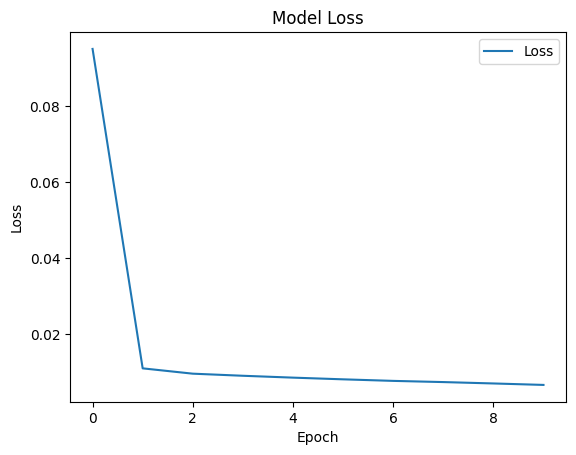

In [37]:
plt.plot(history.history['loss'], label='Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Save Model

In [38]:
model.save('myModel.h5')

### Simulation with Monte Carlo

In [39]:
num_simulations = 100000
time_horizon = 3 * 12  # 3 years in months

random_inputs = np.random.normal(0, 1, (time_horizon, num_simulations))

simulated_returns = np.zeros((time_horizon, num_simulations))

for t in range(time_horizon):
    simulated_returns[t] = model.predict(random_inputs[t].reshape(-1, 1)).flatten()

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
3125

In [41]:
# Summarize results for each year
years = np.arange(1, 4)
yearly_means = np.zeros(3)
yearly_medians = np.zeros(3)
yearly_std_devs = np.zeros(3)
yearly_percentiles_0 = np.zeros(3)
yearly_percentiles_33_333 = np.zeros(3)
yearly_percentiles_66_666 = np.zeros(3)
yearly_min = np.zeros(3)
yearly_max = np.zeros(3)
yearly_percentiles_100 = np.zeros(3)

for year in range(3):
    year_data = simulated_returns[year*12:(year+1)*12].flatten()
    yearly_means[year] = np.mean(year_data)
    yearly_medians[year] = np.median(year_data)
    yearly_std_devs[year] = np.std(year_data)
    yearly_percentiles_0[year] = np.percentile(year_data, 0)
    yearly_percentiles_33_333[year] = np.percentile(year_data, 33.333)

    yearly_percentiles_66_666[year] = np.percentile(year_data, 66.666)
    yearly_min[year] = np.min(year_data)
    yearly_max[year] = np.max(year_data)
    yearly_percentiles_100[year] = np.percentile(year_data, 100)

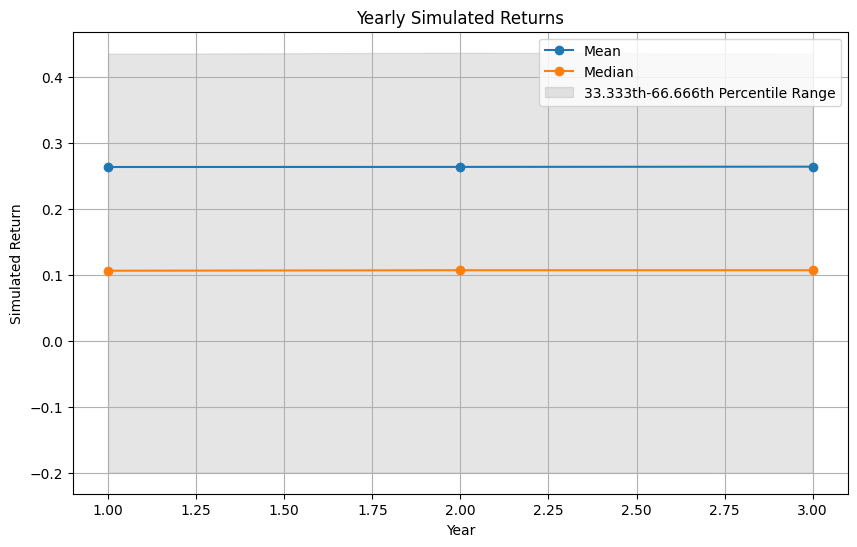

In [42]:
# Plot yearly summary statistics
plt.figure(figsize=(10, 6))
plt.plot(years, yearly_means, label='Mean', marker='o')
plt.plot(years, yearly_medians, label='Median', marker='o')
plt.fill_between(years, yearly_percentiles_33_333, yearly_percentiles_66_666, color='gray', alpha=0.2, label='33.333th-66.666th Percentile Range')
plt.title('Yearly Simulated Returns')
plt.xlabel('Year')
plt.ylabel('Simulated Return')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
# Create DataFrame to display yearly summary statistics
summary_data = {
    "Year": years,
    "Mean": yearly_means,
    "Median": yearly_medians,
    "Std Dev": yearly_std_devs,
    "0th Percentile (Min)": yearly_percentiles_0,
    "33.333th Percentile": yearly_percentiles_33_333,
    "66.666th Percentile": yearly_percentiles_66_666,
    "Max (100th Percentile)": yearly_max
}
summary_df = pd.DataFrame(summary_data)
print(summary_df)

   Year      Mean    Median   Std Dev  0th Percentile (Min)  \
0     1  0.263706  0.106494  0.622159             -0.360178   
1     2  0.263868  0.107217  0.622039             -0.360178   
2     3  0.264214  0.107204  0.622564             -0.360178   

   33.333th Percentile  66.666th Percentile  Max (100th Percentile)  
0            -0.199516             0.435371                4.531911  
1            -0.199556             0.436931                4.916431  
2            -0.199684             0.435066                4.948226  


In [44]:
# Calculate averages of the min, 0th percentile, 33.333th percentile, 66.666th percentile, and max
avg_min = np.mean(yearly_min)
avg_33_333 = np.mean(yearly_percentiles_33_333)
avg_66_666 = np.mean(yearly_percentiles_66_666)
avg_max = np.mean(yearly_max)

# Print the averages
print(f"Average Min (0th Percentile): {avg_min}")
print(f"Average 33.333th Percentile: {avg_33_333}")
print(f"Average 66.666th Percentile: {avg_66_666}")
print(f"Average Max (100th Percentile): {avg_max}")

Average Min (0th Percentile): -0.3601783613363902
Average 33.333th Percentile: -0.19958556029498578
Average 66.666th Percentile: 0.4357891679050521
Average Max (100th Percentile): 4.798856258392334


####  Histogram

In [45]:
simulated_returns = simulated_returns.flatten()

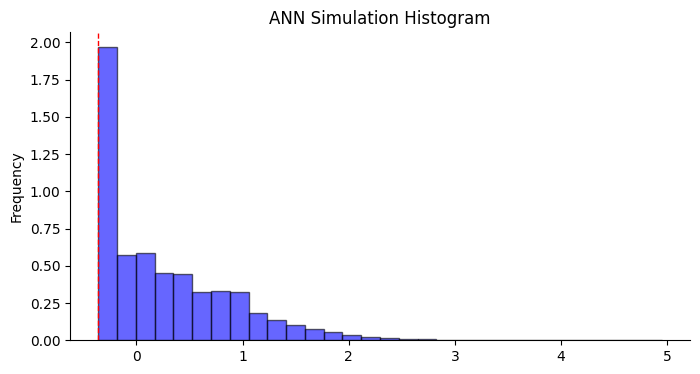

In [53]:
plt.figure(figsize=(8, 4))
plt.hist(simulated_returns, bins=30, density=True, alpha=0.6, color='b', edgecolor='black')
plt.axvline(x=avg_min, color='r', linestyle='dashed', linewidth=1)
plt.title('ANN Simulation Histogram')
plt.ylabel('Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()
